In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from numpy import array, ndarray, argsort, arange

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

import sys
sys.path.insert(1, '../../../utils')
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, plot_multiline_chart, plot_evaluation_results, plot_horizontal_bar_chart, HEIGHT, plot_line_chart
from studies import naive_Bayes_study, logistic_regression_study, knn_study, trees_study, mlp_study

import seaborn as sns

from matplotlib.pyplot import figure, savefig, show, subplots

import pandas as pd


In [2]:
df = pd.read_csv("../data/raw/traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
target_name = "crash_type"
file_tag = "traffic"

target = df[target_name] #pulling target out before dropping non-numerics

features = df.drop(columns=[target_name])

features = features.dropna(axis=1, how="all") # dropping empty variables col-wise
features = features.dropna(axis=0, how="any") # dropping rows with any missing values

target = target.loc[features.index] #target and remaining rows aligned

features = features.select_dtypes(include=["number"]) #keeping only numeric cols

print(features.info())
print("Features shape:", features.shape)
print("Target shape:", target.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   num_units                      209306 non-null  int64  
 1   injuries_total                 209306 non-null  float64
 2   injuries_fatal                 209306 non-null  float64
 3   injuries_incapacitating        209306 non-null  float64
 4   injuries_non_incapacitating    209306 non-null  float64
 5   injuries_reported_not_evident  209306 non-null  float64
 6   injuries_no_indication         209306 non-null  float64
 7   crash_hour                     209306 non-null  int64  
 8   crash_day_of_week              209306 non-null  int64  
 9   crash_month                    209306 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 16.0 MB
None
Features shape: (209306, 10)
Target shape: (209306,)


In [4]:
# train/test splitting
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size=0.3,        #.7 train, .3 test
    random_state=42,      
    stratify=target       # keeps class proportions similar in train and test
)

binary_map = {
    "NO INJURY / DRIVE AWAY": 0,
    "INJURY AND / OR TOW DUE TO CRASH": 1
}

target_train_bin = target_train.map(binary_map)
target_test_bin = target_test.map(binary_map)

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

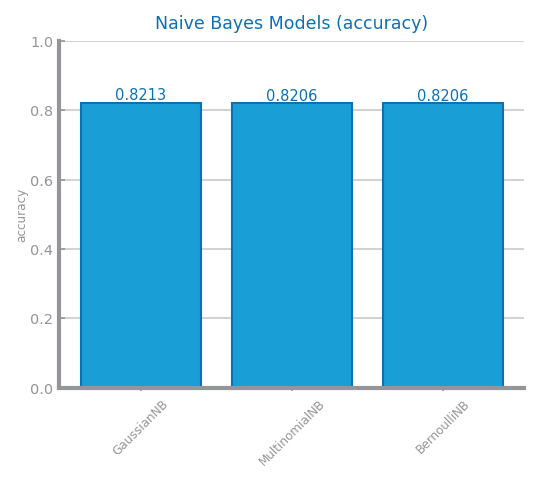

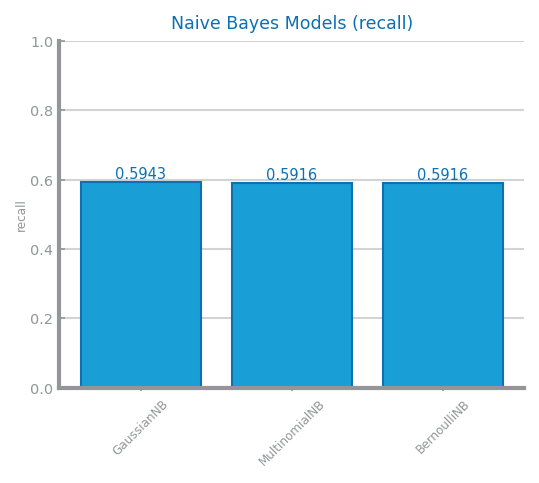

In [21]:
eval_metric = "accuracy"

figure()
nb__best_model_acc, nb__params_acc = naive_Bayes_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    metric=eval_metric
)
savefig(f"../charts/lab1_baseline/{file_tag}_nb_{eval_metric}_study.png", bbox_inches='tight')
show()

figure()
nb__best_model_rec, nb__params_rec = naive_Bayes_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    metric="recall"
)
savefig(f"../charts/lab1_baseline/{file_tag}_nb_recall_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

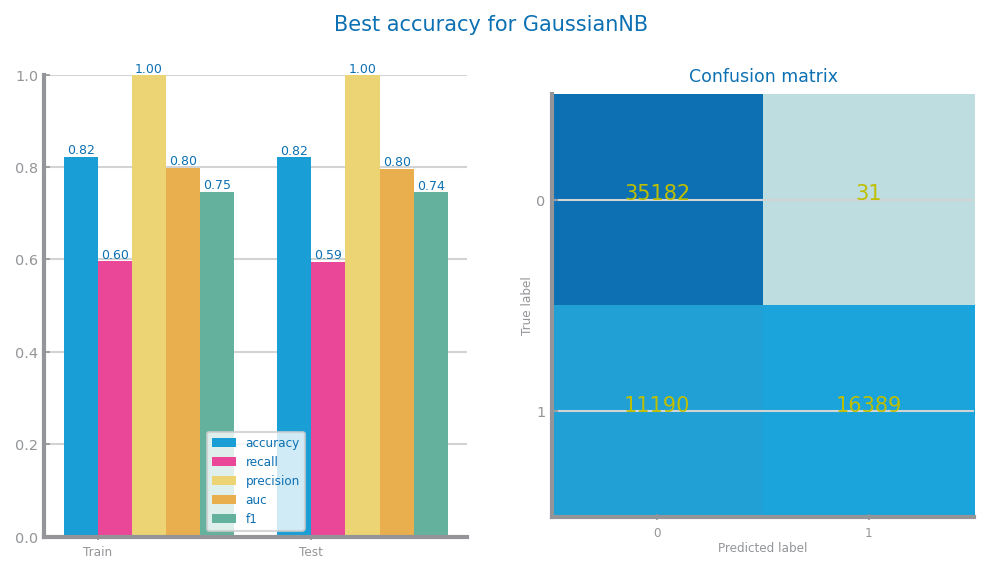

In [22]:
prd_trn_nb = nb__best_model_acc.predict(features_train)
prd_tst_nb = nb__best_model_acc.predict(features_test)

nb_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    nb__params_acc,
    array(target_train_bin),
    array(prd_trn_nb),
    array(target_test_bin),
    array(prd_tst_nb),
    nb_labels
)
savefig(f'../charts/lab1_baseline/{file_tag}_nb_{nb__params_acc["name"]}_best_{nb__params_acc["metric"]}_eval.png', bbox_inches='tight')
show()

**KNN ANALYSIS - TRAFFIC DATA**

KNN best with k=25 and manhattan


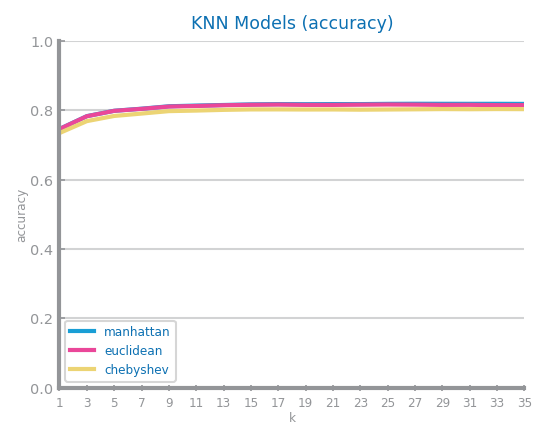

In [9]:
eval_metric = "accuracy"

figure()
knn_best_model, knn_params = knn_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    k_max=35,
    lag=2,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_knn_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

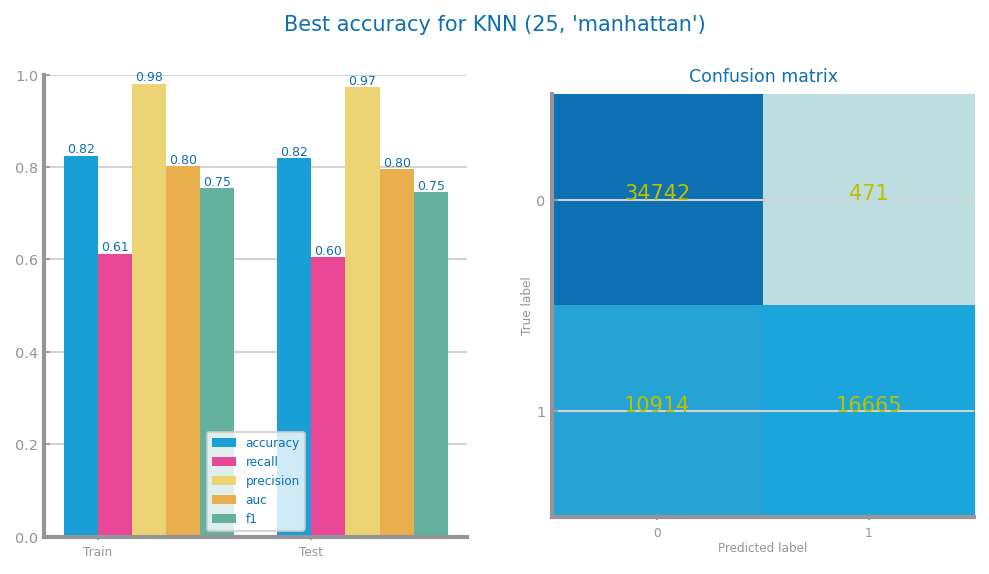

In [10]:
prd_trn_knn = knn_best_model.predict(features_train)
prd_tst_knn = knn_best_model.predict(features_test)

knn_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    knn_params,
    array(target_train_bin),
    array(prd_trn_knn),
    array(target_test_bin),
    array(prd_tst_knn),
    knn_labels,
)
savefig(f"../charts/lab1_baseline/{file_tag}_{knn_params['name']}_best_{knn_params['metric']}_eval.png", bbox_inches='tight')
show()

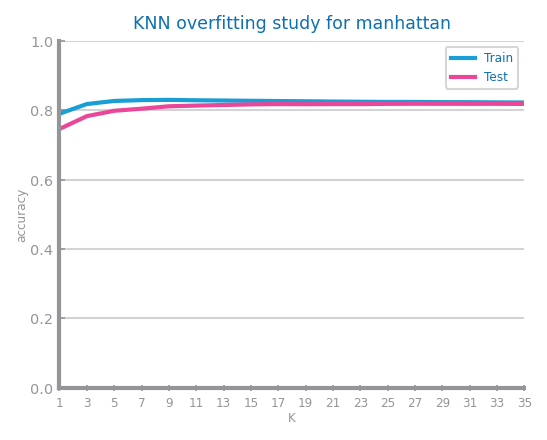

In [11]:
distance = knn_params["params"][1]   # best distance from KNN study, e.g. 'euclidean'
K_MAX = 35
kvalues = [i for i in range(1, K_MAX + 1, 2)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_knn_overfitting.png", bbox_inches='tight')
show()

**LOGISTIC REGRESSION ANALYSIS - TRAFFIC DATA**

LR best for 500 iterations (penalty=l1) with accuracy=0.821187


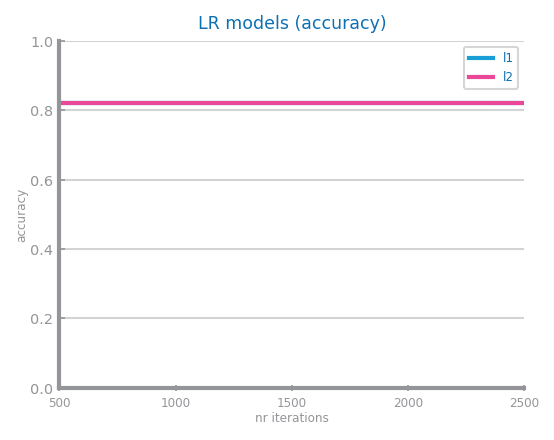

In [7]:
eval_metric = "accuracy"

figure()
lr_best_model, lr_params = logistic_regression_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    nr_max_iterations=2500,
    lag=500,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_lr_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

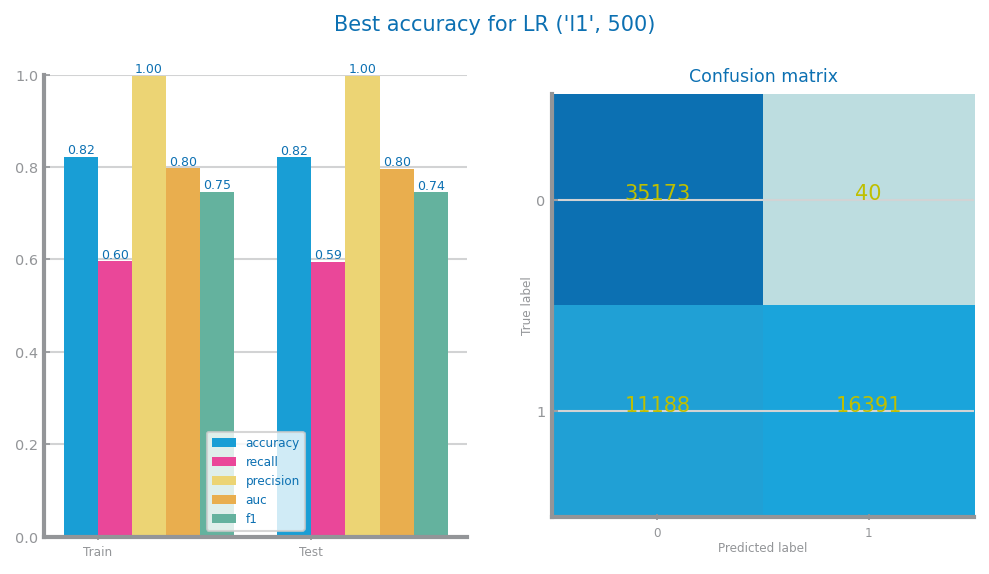

In [8]:
prd_trn_lr = lr_best_model.predict(features_train)
prd_tst_lr = lr_best_model.predict(features_test)

lr_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    lr_params,
    array(target_train_bin),
    array(prd_trn_lr),
    array(target_test_bin),
    array(prd_tst_lr),
    lr_labels,
)
savefig(f'../charts/lab1_baseline/{file_tag}_{lr_params["name"]}_best_{lr_params["metric"]}_eval.png', bbox_inches='tight')
show()

**DECISION TREES ANALYSIS - TRAFFIC DATA**

DT best with entropy and d=5


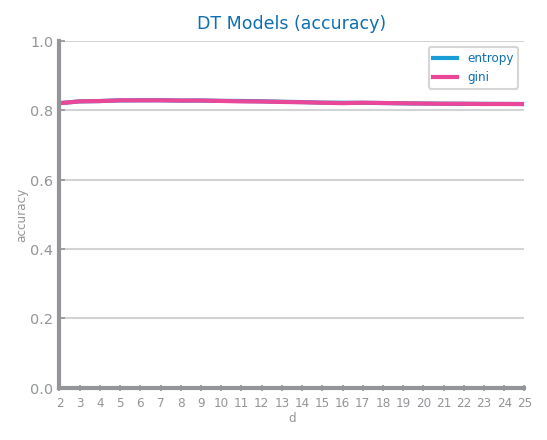

In [12]:
eval_metric = "accuracy"

figure()
dt_best_model, dt_params = trees_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    d_max=25,
    lag=1,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

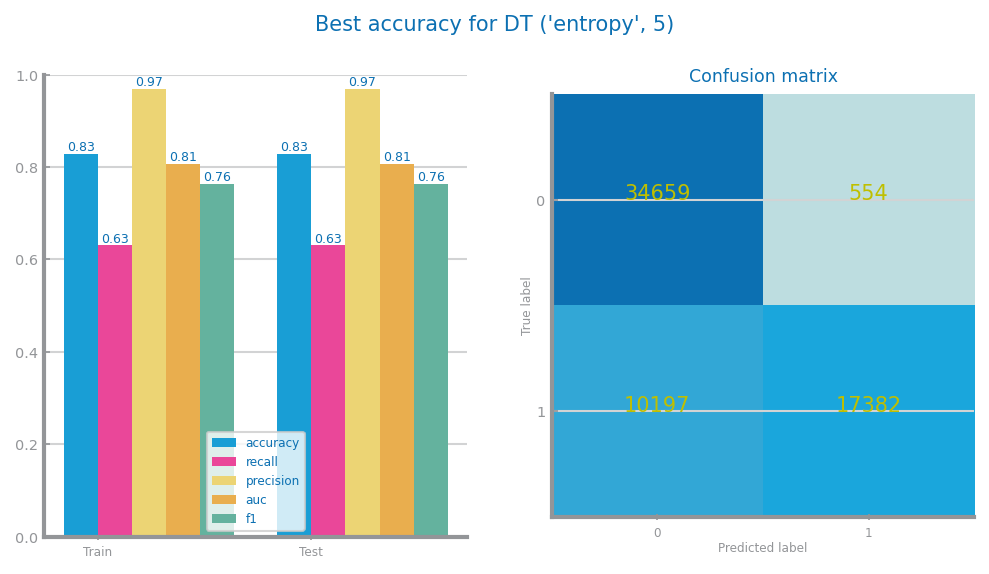

In [13]:
prd_trn_dt = dt_best_model.predict(features_train)
prd_tst_dt = dt_best_model.predict(features_test)

dt_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    dt_params,
    array(target_train_bin),
    array(prd_trn_dt),
    array(target_test_bin),
    array(prd_tst_dt),
    dt_labels,
)
savefig(f'../charts/lab1_baseline/{file_tag}_{dt_params["name"]}_best_{dt_params["metric"]}_eval.png', bbox_inches='tight')
show()

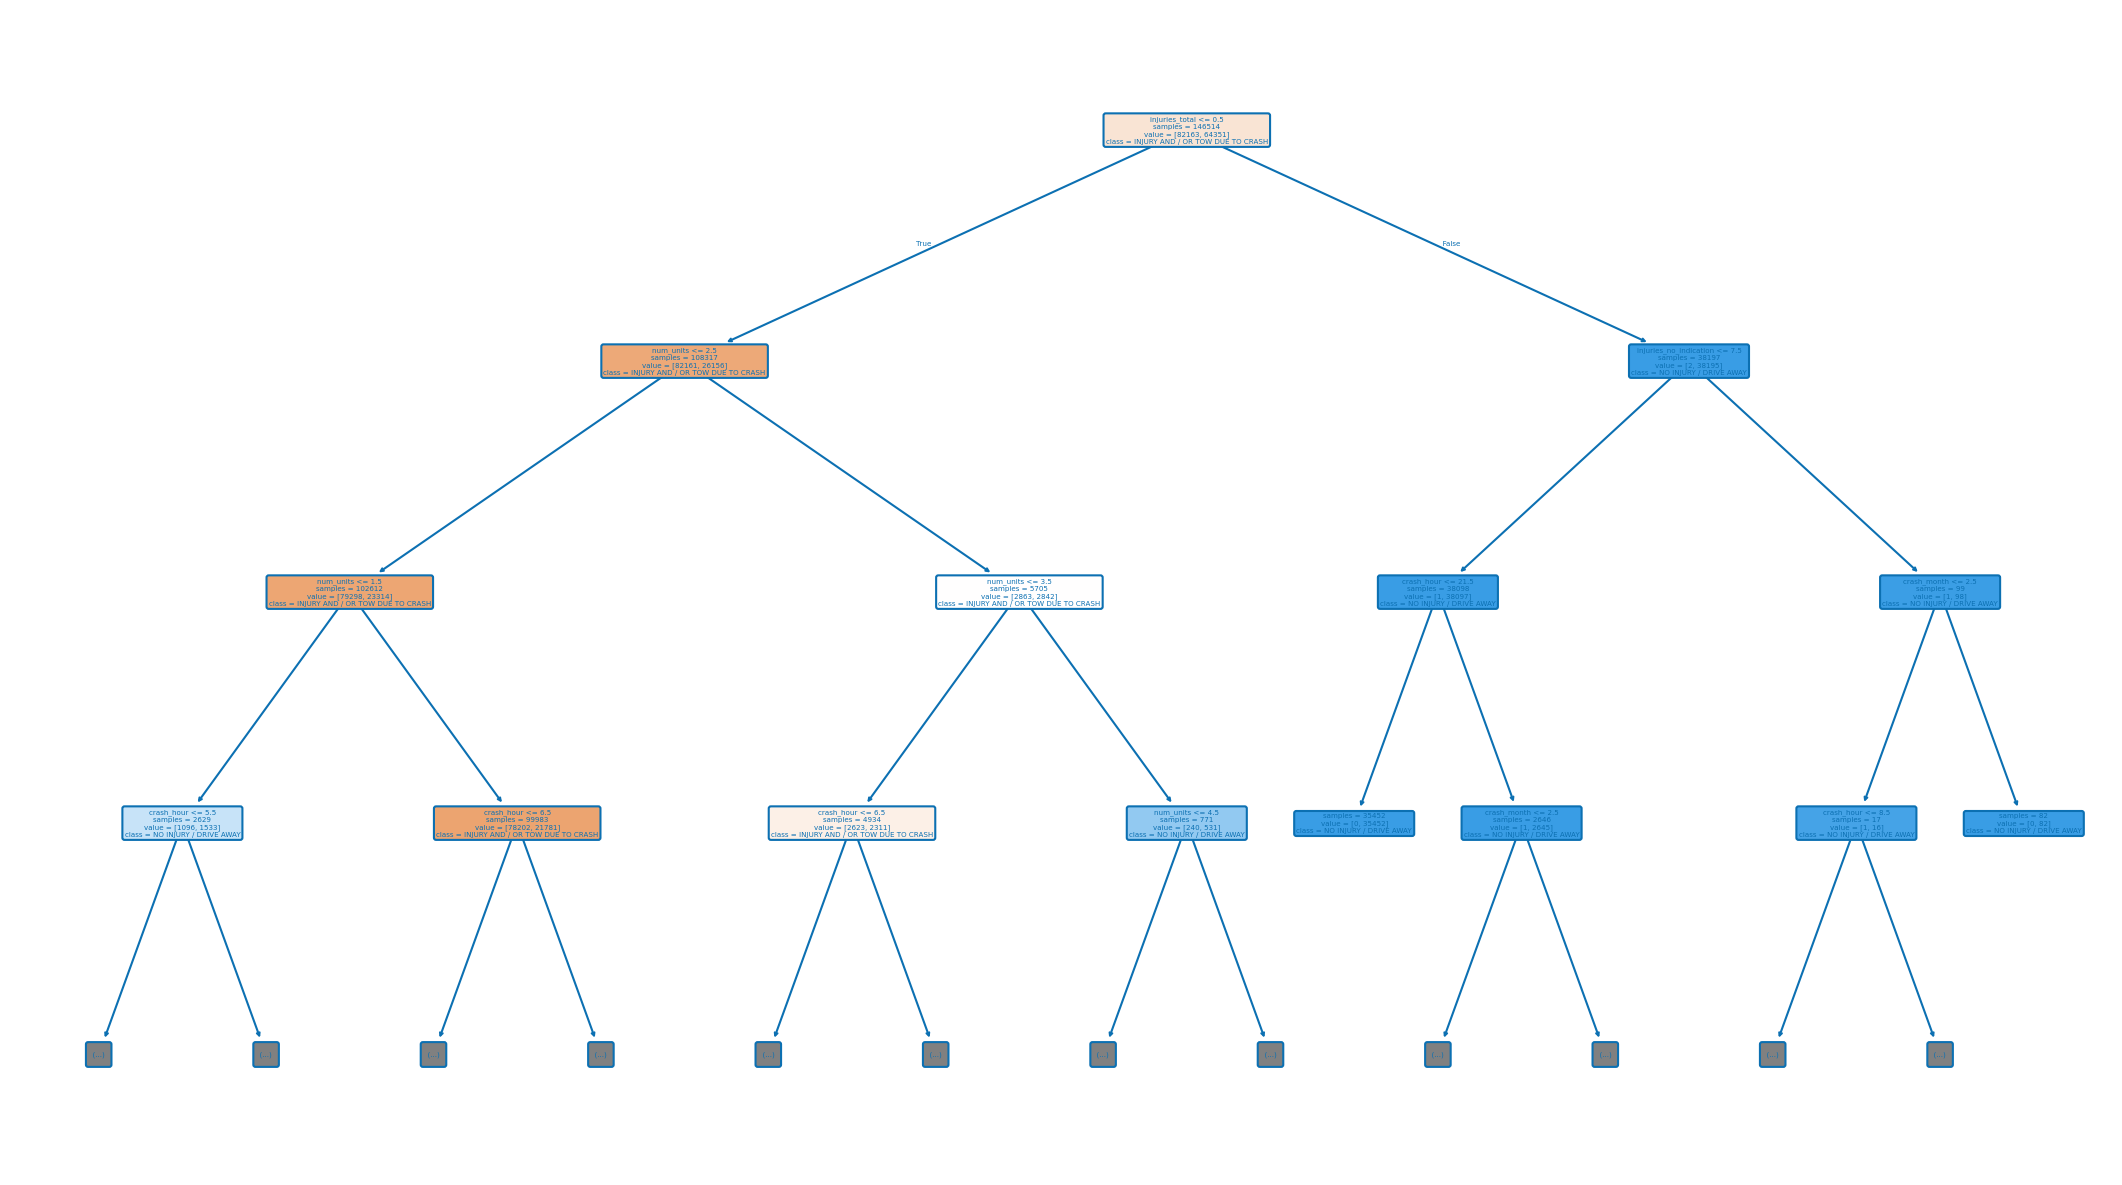

In [14]:
max_depth2show = 3   # adjust if you want deeper/shallower views
dt_feature_names = list(features.columns)

dt_class_names = sorted(target.unique())

figure(figsize=(18, 10))
plot_tree(
    dt_best_model,
    max_depth=max_depth2show,
    feature_names=dt_feature_names,
    class_names=dt_class_names,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_tree_depth{max_depth2show}.png", bbox_inches='tight')
show()

1. injuries_total (0.9358339448795086)
2. num_units (0.04167205876693473)
3. crash_hour (0.01539730941179153)
4. injuries_no_indication (0.006971532558809862)
5. crash_month (9.048097878602945e-05)
6. crash_day_of_week (3.4673404169201916e-05)
7. injuries_reported_not_evident (0.0)
8. injuries_non_incapacitating (0.0)
9. injuries_incapacitating (0.0)
10. injuries_fatal (0.0)


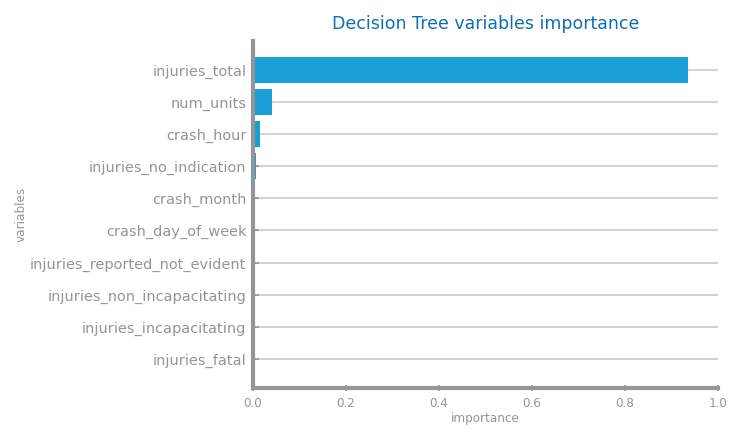

In [15]:
importances = dt_best_model.feature_importances_

indices = argsort(importances)[::-1]
dt_vars = list(features.columns)
elems = []
imp_values = []

# print ranked list like professor
for f in range(len(dt_vars)):
    feature_name = dt_vars[indices[f]]
    feature_imp = importances[indices[f]]

    elems.append(feature_name)
    imp_values.append(feature_imp)

    print(f"{f+1}. {feature_name} ({feature_imp})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_importance_ranking.png", bbox_inches='tight')
show()

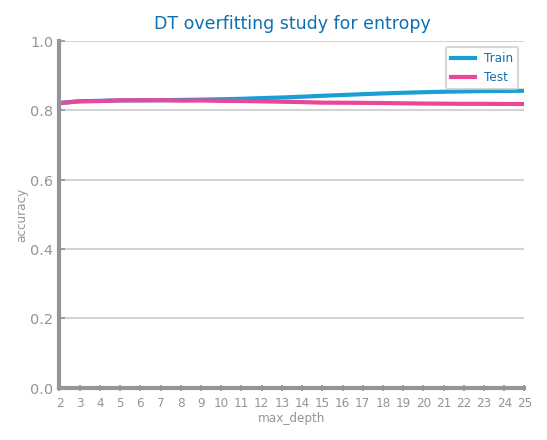

In [16]:
crit = dt_params["params"][0]   # 'entropy' or 'gini'
d_max = 25
depths = [i for i in range(2, d_max + 1, 1)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for d in depths:
    clf = DecisionTreeClassifier(
        max_depth=d,
        criterion=crit,
        min_impurity_decrease=0,
        random_state=42,
    )
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_dt_accuracy_overfitting.png", bbox_inches='tight')
show()

**MLP ANALYSIS - TRAFFIC DATA**

MLP best for 300 iterations (lr_type=adaptive and lr=0.05) with accuracy=0.828848


<Figure size 600x450 with 0 Axes>

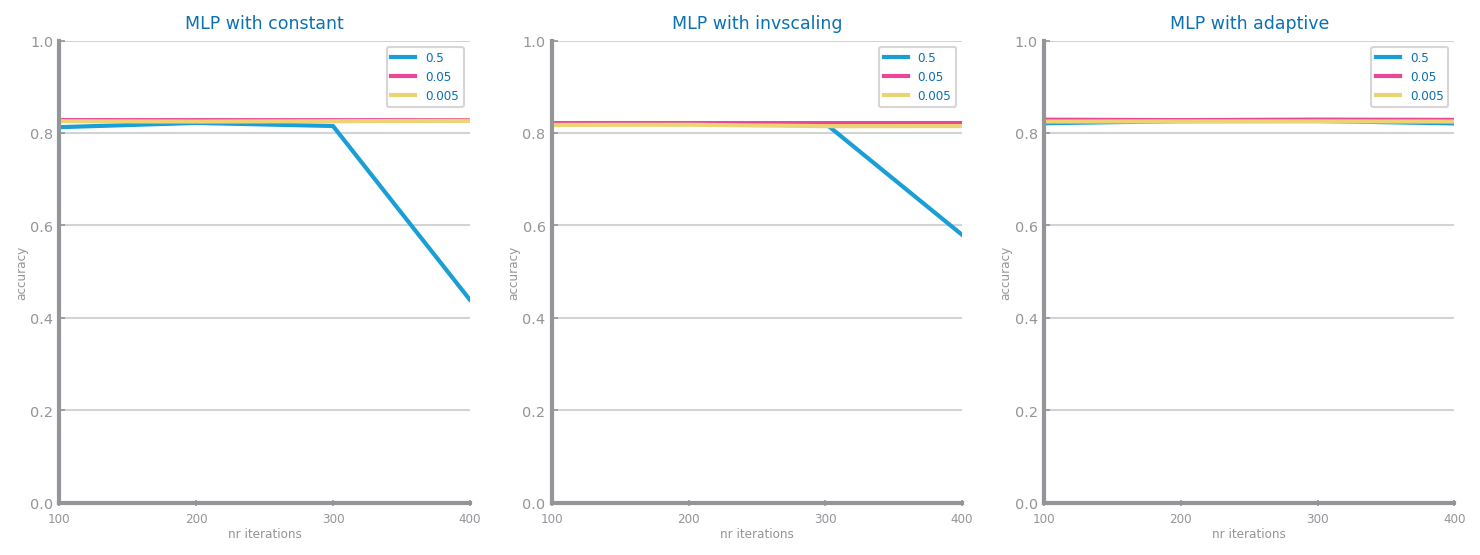

In [17]:
LAG = 100
NR_MAX_ITER = 400

eval_metric = "accuracy"

figure()
mlp_best_model, mlp_params = mlp_study(
    features_train,
    target_train_bin,
    features_test,
    target_test_bin,
    nr_max_iterations=NR_MAX_ITER,
    lag=LAG,
    metric=eval_metric,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_{eval_metric}_study.png", bbox_inches='tight')
show()

<Figure size 600x450 with 0 Axes>

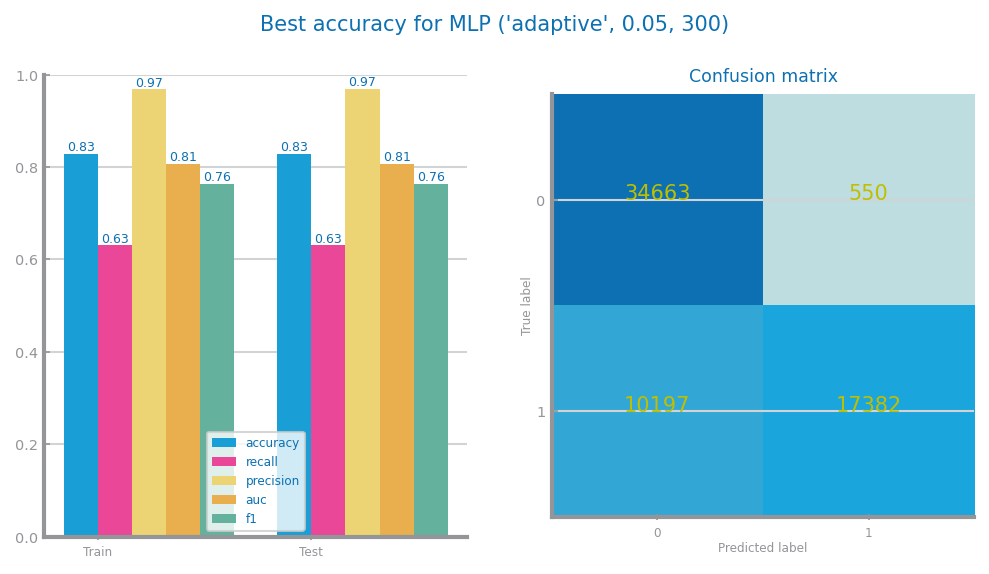

In [18]:
prd_trn_mlp = mlp_best_model.predict(features_train)
prd_tst_mlp = mlp_best_model.predict(features_test)

mlp_labels = sorted(np.unique(target_train_bin))

figure()
plot_evaluation_results(
    mlp_params,
    array(target_train_bin),
    array(prd_trn_mlp),
    array(target_test_bin),
    array(prd_tst_mlp),
    mlp_labels,
)
savefig(f"../charts/lab1_baseline/{file_tag}_{mlp_params['name']}_best_{mlp_params['metric']}_eval.png", bbox_inches='tight')
show()

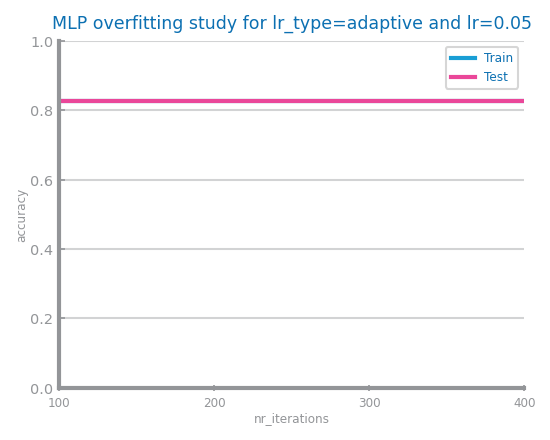

In [19]:
lr_type = mlp_params["params"][0]
lr = mlp_params["params"][1]

nr_iterations = [i for i in range(LAG, NR_MAX_ITER + 1, LAG)]

y_tst_values = []
y_trn_values = []
acc_metric = "accuracy"

for n in nr_iterations:
    clf = MLPClassifier(
        learning_rate=lr_type,
        learning_rate_init=lr,
        max_iter=n,
        activation="logistic",
        solver="adam",
        verbose=False,
        random_state=42,
    )
    clf.fit(features_train, target_train_bin)
    prd_tst_Y = clf.predict(features_test)
    prd_trn_Y = clf.predict(features_train)

    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](target_test_bin, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](target_train_bin, prd_trn_Y))

figure()
plot_multiline_chart(
    nr_iterations,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"MLP overfitting study for lr_type={lr_type} and lr={lr}",
    xlabel="nr_iterations",
    ylabel=acc_metric,
    percentage=True,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_accuracy_overfitting.png", bbox_inches='tight')
show()

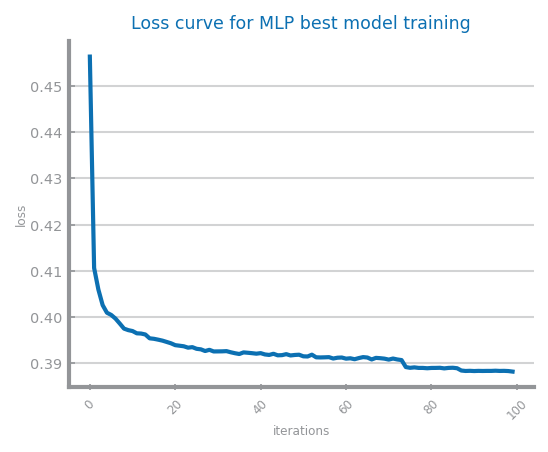

In [20]:
figure()
plot_line_chart(
    arange(len(mlp_best_model.loss_curve_)),
    mlp_best_model.loss_curve_,
    title="Loss curve for MLP best model training",
    xlabel="iterations",
    ylabel="loss",
    percentage=False,
)
savefig(f"../charts/lab1_baseline/{file_tag}_mlp_{eval_metric}_loss_curve.png", bbox_inches='tight')
show()